## Wichtige Hinweise
- Dieses Notebook erzeugt für jede Knotenzahl `n` einen Graphen mit `n*(n-1)` Kanten (ohne Selbstschleifen).
- `network_simplex` benötigt auf den Knoten das Attribut `demand`: negative Werte bedeuten Angebot (supply), positive Nachfrage. In diesem Projekt bedeutet `Node.supply` positive Werte = Produktion, negative = Konsum; wir setzen `demand = -supply`.
- Bei großen `n` kann der Algorithmus lange laufen oder viel Speicher benötigen — passe die Liste `nodes_list` an deine Maschine an.

In [ ]:
# Imports & Setup
import time
import math
import statistics
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import networkx as nx
from generator import generate_random_directed_graph

# Für konsistente Ergebnisse (Basisseed)
SEED = 1000

# Liste der zu testenden Knotengrößen (anpassen falls zu langsam)
# Standard: ausgewählte n-Werte; m = n*(n-1) wächst quadratisch
nodes_list = [2**n for n in range(2, 10)]  # passe bei Bedarf an
print("Nodes to test:", nodes_list)

# Anzahl Wiederholungen pro Konfiguration (mit verschiedenen Seeds)
REPEATS = 10

# Parameter für Generierung
SUPPLY_RANGE = 10  # Zufallsbereich für supplies (erste n-1 Knoten)

# Ergebnis-Container
# tuples: (n, m, mean_elapsed, std_elapsed, successes, failures, all_times)
results = []

Nodes to test: [4, 8, 16, 32, 64, 128, 256, 512]


In [13]:
def build_flow_graph(nodes, edges):
    """Konvertiert die Node/Edge-Listen in einen networkx.DiGraph, geeignet für network_simplex.
    - setzt `demand` auf Knoten (demand = -supply)
    - setzt auf Kanten `capacity` (groß) und `weight` (Kosten)
    """
    G = nx.DiGraph()
    for n in nodes:
        # networkx network_simplex: demand >0 = Nachfrage, demand <0 = Angebot/supply
        demand = -n.supply
        G.add_node(n.id, demand=demand)
    for e in edges:
        # setze capacity hoch, weight als simple Kosten (z.B. 1)
        G.add_edge(e.source, e.target, capacity=10**9, weight=1)
    return G

In [14]:
# Benchmark-Loop mit Wiederholungen pro Konfiguration (REPEATS)
# Verwende tqdm zur Anzeige des Fortschritts über die Knotengrößen
for n in tqdm(nodes_list, desc='Konfigurationen'):
    m = n * (n - 1)  # maximale Anzahl gerichteter Kanten ohne Selbstschleifen
    # times für diese Konfiguration sammeln
    times = []
    successes = 0
    failures = 0
    # innere Schleife mit Fortschrittsbalken über Wiederholungen
    for r in tqdm(range(REPEATS), desc=f'runs per n={n}', leave=False):
        seed = SEED + r  # unterschiedliche Seeds pro Wiederholung
        try:
            nodes, edges = generate_random_directed_graph(n, m, seed, supply_range=SUPPLY_RANGE, balance_demand=True)
            G = build_flow_graph(nodes, edges)
            start = time.perf_counter()
            cost, flow_dict = nx.network_simplex(G)
            elapsed = time.perf_counter() - start
            times.append(elapsed)
            successes += 1
        except Exception as exc:
            # bei Fehlern None speichern und zählen
            times.append(None)
            failures += 1
    # Filter successful times for statistics
    successful_times = [t for t in times if t is not None]
    if successful_times:
        mean_t = statistics.mean(successful_times)
        std_t = statistics.pstdev(successful_times) if len(successful_times) > 1 else 0.0
    else:
        mean_t = None
        std_t = None
    results.append((n, m, mean_t, std_t, successes, failures, times))

# Zusammenfassung ausgeben
print('\nBenchmark abgeschlossen. Ergebnisse (n, m, mean_s, std_s, success, failures, all_times):')
for rec in results:
    print(rec)

Konfigurationen:   0%|          | 0/8 [00:00<?, ?it/s]

runs per n=4:   0%|          | 0/25 [00:00<?, ?it/s]

runs per n=8:   0%|          | 0/25 [00:00<?, ?it/s]

runs per n=16:   0%|          | 0/25 [00:00<?, ?it/s]

runs per n=32:   0%|          | 0/25 [00:00<?, ?it/s]

runs per n=64:   0%|          | 0/25 [00:00<?, ?it/s]

runs per n=128:   0%|          | 0/25 [00:00<?, ?it/s]

runs per n=256:   0%|          | 0/25 [00:00<?, ?it/s]

runs per n=512:   0%|          | 0/25 [00:00<?, ?it/s]


Benchmark abgeschlossen. Ergebnisse (n, m, mean_s, std_s, success, failures, all_times):
(4, 12, 0.011475568002206274, 0.0555674808031907, 25, 0, [0.28369939999538474, 0.0002482999989297241, 0.00016419999883510172, 0.00011910000466741621, 0.00010469999688211828, 0.0001221999991685152, 0.00012780001270584762, 0.00010459999612066895, 0.0001002000062726438, 0.0001343000039923936, 0.00011680000170599669, 0.00012220001372043043, 0.00034220000088680536, 0.00012769999739248306, 0.00011660000018309802, 0.00011190000805072486, 0.00011399999493733048, 0.00011249999806750566, 0.0001066999975591898, 0.00011060001270379871, 0.00012119999155402184, 0.00012910000805277377, 0.0001238000113517046, 0.00011079999967478216, 9.830000635702163e-05])
(8, 56, 0.0010949600004823879, 0.0005312537960637902, 25, 0, [0.0010994999902322888, 0.0007418000022880733, 0.000571900003706105, 0.0007972000021254644, 0.0015530999953625724, 0.0016381000023102388, 0.001123800000641495, 0.0011989999911747873, 0.001030500003253

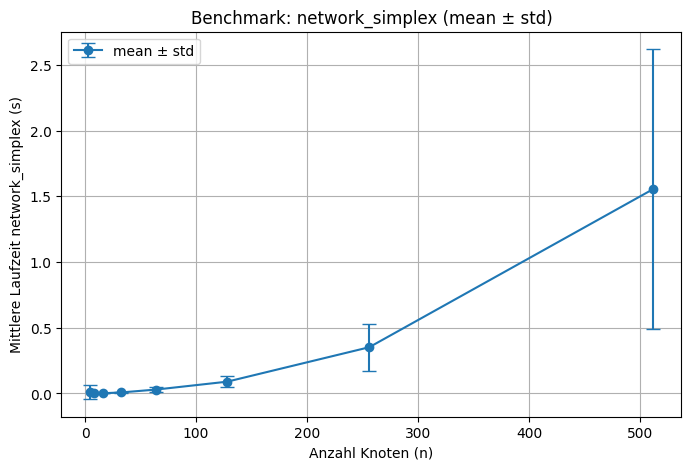

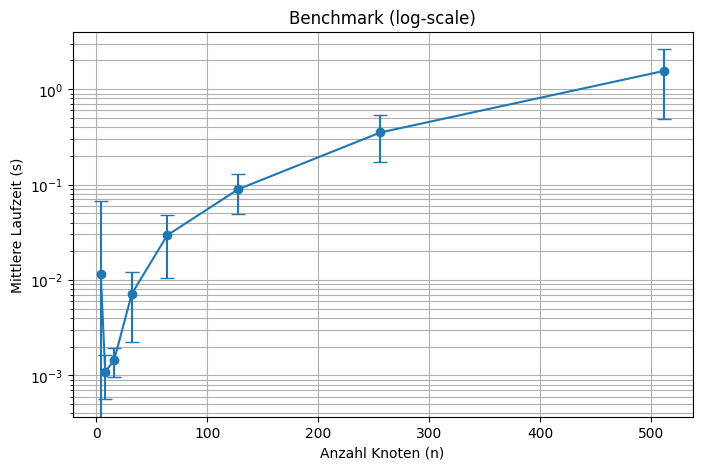

C:\Users\Jan\AppData\Local\Temp\ipykernel_7588\3832874334.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cleaned, labels=[str(r[0]) for r in results])


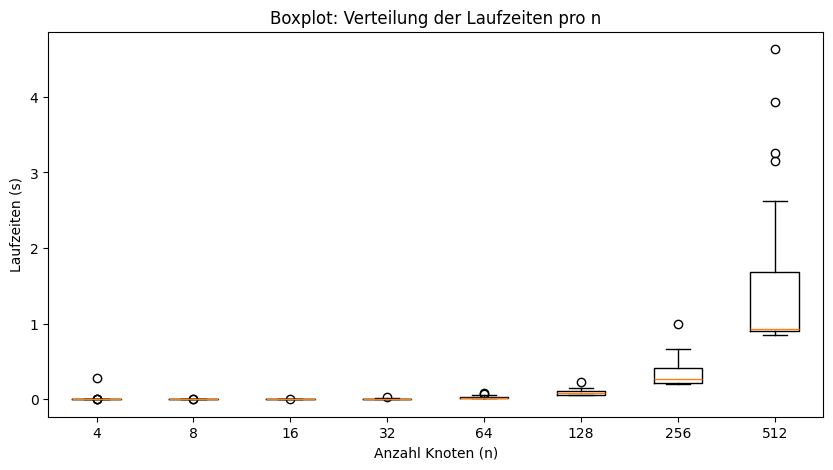

In [15]:
# Plotte aggregierte Laufzeiten (Mittelwerte mit Fehlerbalken)
ns = [r[0] for r in results]
means = [r[2] for r in results]
stds = [r[3] for r in results]
plt.figure(figsize=(8,5))
plt.errorbar(ns, means, yerr=stds, fmt='-o', capsize=5, label='mean ± std')
plt.xlabel('Anzahl Knoten (n)')
plt.ylabel('Mittlere Laufzeit network_simplex (s)')
plt.title('Benchmark: network_simplex (mean ± std)')
plt.grid(True)
plt.legend()
plt.show()

# Log-Scale Ansicht
plt.figure(figsize=(8,5))
plt.errorbar(ns, means, yerr=stds, fmt='-o', capsize=5)
plt.xlabel('Anzahl Knoten (n)')
plt.ylabel('Mittlere Laufzeit (s)')
plt.yscale('log')
plt.title('Benchmark (log-scale)')
plt.grid(True, which='both')
plt.show()

# Optional: Boxplot der Rohdaten pro n (falls benötigt)
all_times = [r[6] for r in results]  # enthält None für Fehlschläge
cleaned = [[t for t in arr if t is not None] for arr in all_times]
if any(cleaned):
    plt.figure(figsize=(10,5))
    plt.boxplot(cleaned, labels=[str(r[0]) for r in results])
    plt.xlabel('Anzahl Knoten (n)')
    plt.ylabel('Laufzeiten (s)')
    plt.title('Boxplot: Verteilung der Laufzeiten pro n')
    plt.show()

## Tipps zur Erweiterung
- Du kannst `nodes_list` vergrößern, aber achte auf Speicher und Laufzeit.
- Statt `weight=1` auf allen Kanten kannst du zufällige Kosten setzen, z. B. `weight=rng.randint(1,10)`, um realistischere Netzwerke zu testen.
- Für statistische Stabilität: führe mehrere Läufe pro `n` durch und nehme den Median oder das 95%-Quantil der Laufzeit.
- Bei sehr großen Graphen kann es sinnvoll sein, `network_simplex` in einer eigenen Prozess/Session laufen zu lassen, um Out-of-Memory zu verhindern.